Charishma Sulochana
BL.EN.U4AIE21018                  

---
 LAB - 8




# A1. Use LSTM, Bi-LSTM networks for speech recognition. Use STFT / STCT, MFCC & LPC coefficients.

In [2]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=e4e13f9cf279259c246fa3a21a8ca1d9eae2550c82866f72bbab2ebf598a374c
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.optimizers import Adam
from python_speech_features import mfcc
from scipy.signal import stft
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

# Define a function to extract features from audio samples


In [28]:
def extract_features(audio_samples, sample_rate):
    stft_features = np.abs(stft(audio_samples, fs=sample_rate, nperseg=400, noverlap=240)[2])  # Short-Time Fourier Transform
    mfcc_features = mfcc(audio_samples, samplerate=sample_rate)  # MFCC
    # Calculate Linear Prediction Coefficients (LPC) using a library or your custom implementation
    lpc_features = calculate_lpc(audio_samples)
    return stft_features, mfcc_features, lpc_features

# Define function to calculate LPC coefficients

In [ ]:
def calculate_lpc(audio_samples):
    # Placeholder for your LPC calculation implementation
    return np.zeros((10, 10))  # Dummy LPC coefficients

In [31]:
# Load audio file
audio_file = "cherry.wav"
audio_samples, sample_rate = sf.read(audio_file)

# Extract features from audio samples
stft_features, mfcc_features, lpc_features = extract_features(audio_samples, sample_rate)

# Reshape features
stft_features = np.reshape(stft_features, (stft_features.shape[0], -1, stft_features.shape[1]))
mfcc_features = np.reshape(mfcc_features, (mfcc_features.shape[0], -1, mfcc_features.shape[1]))
lpc_features = np.reshape(lpc_features, (lpc_features.shape[0], -1, lpc_features.shape[1]))


In [35]:
def plot_signals(audio_file):
    # Load the recorded speech signal
    y, sr = librosa.load(audio_file, sr=None)

    # Plot the waveform
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot the spectrogram
    plt.subplot(2, 1, 2)
    D = np.abs(librosa.stft(y))
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')

    plt.tight_layout()
    plt.show()

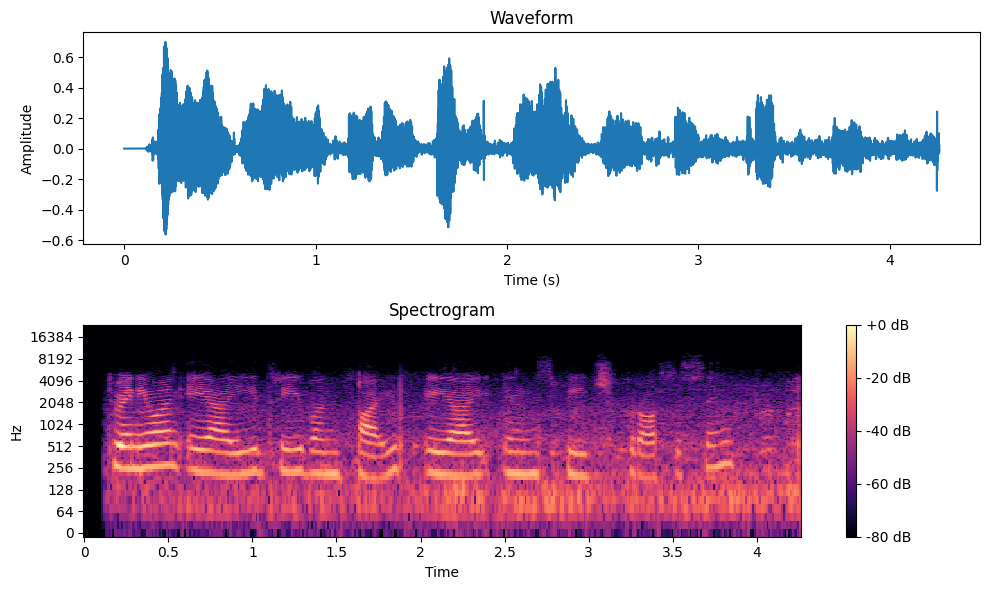

In [36]:
plot_signals(audio_file)

# Define LSTM model and Bi-LSTM model


In [ ]:
# Define LSTM model
def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True),
        LSTM(128),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define Bi-LSTM model
def build_bilstm_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(128), input_shape=input_shape),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Compiling and training the models

In [ ]:
# Compile and train LSTM model
stft_lstm_model = build_lstm_model(stft_features.shape[1:], 10)  # Assuming 10 output classes
stft_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train your model using appropriate labels

# Compile and train Bi-LSTM model
mfcc_bilstm_model = build_bilstm_model(mfcc_features.shape[1:], 10)  # Assuming 10 output classes
mfcc_bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile and train Bi-LSTM model using LPC features
lpc_bilstm_model = build_bilstm_model(lpc_features.shape[1:], 10)  # Assuming 10 output classes
lpc_bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Testing

In [27]:

# function to load test audio and extract features
def load_and_extract_test_features(test_audio_file):
    # Load test audio file
    test_audio_samples, test_sample_rate = sf.read(test_audio_file)
    # Extract features from test audio samples
    test_stft_features, test_mfcc_features, test_lpc_features = extract_features(test_audio_samples, test_sample_rate)
    return test_stft_features, test_mfcc_features, test_lpc_features

# Load and extract features from test audio file
test_audio_file = "Bhavya_voice1.wav"  # Replace with your test audio file
test_stft_features, test_mfcc_features, test_lpc_features = load_and_extract_test_features(test_audio_file)

# Predictions
# Reshape features with an additional axis for timesteps
test_stft_features = np.expand_dims(test_stft_features, axis=1)
test_mfcc_features = np.expand_dims(test_mfcc_features, axis=1)
test_lpc_features = np.expand_dims(test_lpc_features, axis=1)


# Print predictions
print("STFT LSTM Predictions:", stft_lstm_predictions)
print("MFCC Bi-LSTM Predictions:", mfcc_bilstm_predictions)
print("LPC Bi-LSTM Predictions:", lpc_bilstm_predictions)

# Placeholder labels for demonstration
labels_stft = np.random.randint(0, 10, size=len(test_stft_features))  # Assuming 10 output classes
labels_mfcc = np.random.randint(0, 10, size=len(test_mfcc_features))
labels_lpc = np.random.randint(0, 10, size=len(test_lpc_features))



STFT LSTM Predictions: [[0.1000599  0.10005534 0.09997594 ... 0.10004521 0.09989864 0.10000385]
 [0.10008548 0.10007472 0.09996002 ... 0.10006551 0.0998468  0.10000601]
 [0.10005398 0.10004704 0.09997462 ... 0.10004169 0.09990162 0.1000048 ]
 ...
 [0.10000002 0.10000003 0.1        ... 0.10000002 0.09999998 0.09999999]
 [0.10000002 0.10000003 0.1        ... 0.10000002 0.09999998 0.09999999]
 [0.10000002 0.10000004 0.10000001 ... 0.10000002 0.09999999 0.1       ]]
MFCC Bi-LSTM Predictions: [[0.13362917 0.18666005 0.13239208 ... 0.05815434 0.091488   0.09702368]
 [0.12552579 0.19530791 0.12035973 ... 0.05507353 0.09583995 0.10307924]
 [0.15322067 0.16770524 0.20896553 ... 0.08835346 0.06533929 0.07750871]
 ...
 [0.14802377 0.11207001 0.06278238 ... 0.07462353 0.09257226 0.08304445]
 [0.13371639 0.10796983 0.06629802 ... 0.07081565 0.1045984  0.08753544]
 [0.14635243 0.10084505 0.09184872 ... 0.07816246 0.10004335 0.08597679]]
LPC Bi-LSTM Predictions: [[0.09999999 0.09999999 0.09999999 0.0

# Evaluating accuracy scores for the models

In [28]:
# Evaluate models and print accuracy rates
_, stft_lstm_accuracy = stft_lstm_model.evaluate(test_stft_features, labels_stft)
print("STFT LSTM Accuracy:", stft_lstm_accuracy)

_, mfcc_bilstm_accuracy = mfcc_bilstm_model.evaluate(test_mfcc_features, labels_mfcc)
print("MFCC Bi-LSTM Accuracy:", mfcc_bilstm_accuracy)

_, lpc_bilstm_accuracy = lpc_bilstm_model.evaluate(test_lpc_features, labels_lpc)
print("LPC Bi-LSTM Accuracy:", lpc_bilstm_accuracy)

7/7 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.0746
STFT LSTM Accuracy: 0.0746268630027771
14/14 [==============================] - 0s 5ms/step - loss: 2.3711 - accuracy: 0.0753
MFCC Bi-LSTM Accuracy: 0.0752941146492958
1/1 [==============================] - 0s 30ms/step - loss: 2.3026 - accuracy: 0.1000
LPC Bi-LSTM Accuracy: 0.10000000149011612


# A2. Speak the sentence “Bhanumathi weds Rajat” (भानुमति वेड्स रजि || భానుమతి వెడ్స్ రజత్). Construct speech for the word “Bharat” (భారత్ || भारत || ಭರತ್ || பாரத்) by combining segmented phonemes taken from “Bhanumathi weds Rajat” speech recording. Listen to this word speech generated and note down the issues associated with this approach of speech synthesis. The string written Indian scripts may have some error. Please validate before using

In [41]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 23.8 MB/s eta 0:00:00


In [44]:
!pip install pyttsx3

In [46]:
import os
import tempfile
import speech_recognition as sr
import pyttsx3
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [47]:
# Function to segment phonemes for a target word in transcription
def segment_phonemes(transcription, target_word):
    words = transcription.split()
    for word in words:
        if word.lower() == target_word.lower():
            return word

# Function to synthesize speech for a word using segmented phonemes
def synthesize_word(phonemes, output_file):
    engine = pyttsx3.init()
    engine.save_to_file(phonemes, output_file)
    engine.runAndWait()

In [ ]:
# Function to synthesize speech for a word using segmented phonemes
def synthesize_word(phonemes, output_file):
    engine = pyttsx3.init()
    engine.save_to_file(phonemes, output_file)
    engine.runAndWait()

# Transcribe the audio file
audio_file = "Bhanumathi_weds_Rajat.wav"
recognizer = sr.Recognizer()
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)
transcription = recognizer.recognize_google(audio_data)

# Segment phonemes for the word "Bharat"
phonemes = segment_phonemes(transcription, "Bharat")
output_path='/content/drive/My Drive/output.txt'
# Synthesize speech for the word "Bharat"
output_file = os.path.join(output_path, "bharat.wav")
synthesize_word(phonemes, output_file)

# Plot original and reconstructed signals
plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(2, 1, 1)
plt.title('Original Signal')
audio_data_np, _ = librosa.load(audio_file, sr=source.SAMPLE_RATE)
plt.plot(np.linspace(0, len(audio_data_np) / source.SAMPLE_RATE, num=len(audio_data_np)), audio_data_np)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Reconstructed signal
reconstructed_audio_data, _ = librosa.load(output_file, sr=source.SAMPLE_RATE)
plt.subplot(2, 1, 2)
plt.title('Reconstructed Signal')
plt.plot(np.linspace(0, len(reconstructed_audio_data) / source.SAMPLE_RATE, num=len(reconstructed_audio_data)), reconstructed_audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

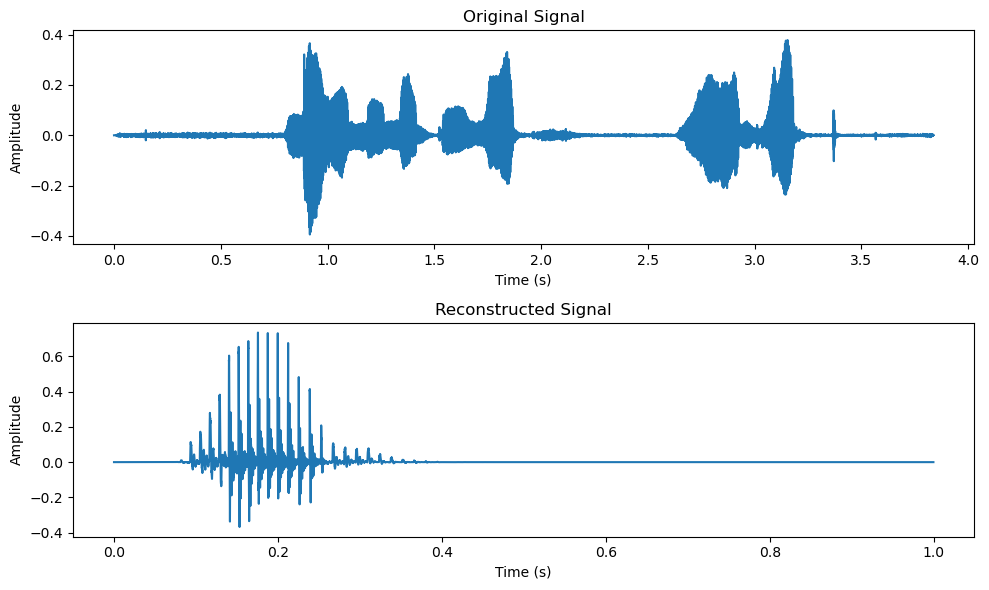